<a href="https://colab.research.google.com/github/auranissaefrida/StudyCase03/blob/main/Study_Case_Data_Mining_%26_BI_Kelompok_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**KELOMPOK F**



1.   Anantawidya Prayoga (2006483523)
2.   Auranissa Efrida P (2006571192)
3.   Daranita Sukmajati (2006570946)
4.   Ghefira Nur Fatimah Widyasari (2006483694)
5.   Kamilia Firzanah (2006526144)
6.   Wildan Damar Adji (2006487326)
7.   Raafi Putri Ramadhani Salamah (2006570952)

##**Problem Statement**
Market Basket Analysis Toko AlfaIndo Cabang UI Depok
1. AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Surabaya, dan Medan.
2. Pasca masa pandemi Toko AlfaIndo cabang UI Depok mengalami penurunan laba yang signifikan.
3. Anda ditugaskan oleh pimpinan untuk membantu toko ALfaIndo cabang UI Depok untuk bangkit dari keterpurukannya.

####
1. Barang apa yang sering dibeli?
2. Barang apa yang tidak laku?
3. Barang apa yang cenderung dibeli bersamaan?





##**Data Cleaning, Pre-Processing, Data Wrangling**##



In [ ]:
#import module yang dibutuhkan
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
! pip install apyori
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/auranissaefrida/StudyCase03/main/Datmin-casestudy3%20(1).csv')
df.sample(10)

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
17,5,7/3/2022 0:00,Mr. A,10,Air Minum,Sprit,2
22,7,7/4/2022 0:00,Mr. Z,9,Rokok,Malioboro,1
47,14,7/7/2022 0:00,Mr.Y,6,Snack,Chiki,1
21,7,7/4/2022 0:00,Mr. Z,10,Air Minum,Sprit,1
30,9,7/5/2022 0:00,Mr. X,6,Snack,Chiki,2
35,10,7/5/2022 0:00,Mr. T,6,Snack,Chiki,2
6,2,7/1/2022 0:00,Mr. B,3,Roti,Prambanan,1
14,4,7/2/2022 0:00,Mr. B,7,Sabun,Luks,1
54,18,10/2/2022 0:00,Mr. B,1,Roti,Sri Roti,2
45,14,7/7/2022 0:00,Mr.Y,7,Sabun,Luks,2


In [ ]:
df.shape

(56, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Transaksi  56 non-null     int64 
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID Produk     56 non-null     int64 
 4   Nama Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ KB


In [ ]:
# Preprocessing
df['Nama Produk'] = df['Nama Produk'].str.strip() # remove unnecessary spaces
df['Nama Produk'] = df['Nama Produk'].str.lower() # lower case normalization
df.dropna(axis=0, subset=['ID Transaksi'], inplace=True) # delete rows with no invoice no
df['ID Transaksi'] = df['ID Transaksi'].astype('str') # Change data type
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/2022 0:00,Mr. A,1,roti,Sri Roti,2
1,1,7/1/2022 0:00,Mr. A,2,air minum,Aquos,1
2,1,7/1/2022 0:00,Mr. A,11,mie instan,Indomi,2
3,1,7/1/2022 0:00,Mr. A,12,mie instan,Mi Sedap,1
4,2,7/1/2022 0:00,Mr. B,2,air minum,Aquos,1


In [ ]:
df.shape

(56, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Transaksi  56 non-null     object
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID Produk     56 non-null     int64 
 4   Nama Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 3.5+ KB


In [ ]:
df.describe()

,ID Produk,Jumlah
count,56.000000,56.000000
mean,6.250000,1.500000
std,3.475891,0.572078
min,1.000000,1.000000
25%,3.750000,1.000000
50%,6.000000,1.000000
75%,9.250000,2.000000
max,12.000000,3.000000


#**Market Basket Analysis Berdasarkan Nama Produk**#

In [ ]:
# Group the transaction
basket = df
basket = basket.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

Nama Produk,air minum,mie instan,rokok,roti,sabun,shampoo,snack
ID Transaksi,,,,,,,
1,1.0,3.0,0.0,2.0,0.0,0.0,0.0
10,2.0,0.0,0.0,1.0,0.0,0.0,2.0
11,0.0,0.0,1.0,2.0,0.0,0.0,0.0
12,0.0,3.0,0.0,0.0,2.0,1.0,0.0
13,1.0,0.0,0.0,1.0,0.0,0.0,2.0


In [ ]:
basket

Nama Produk,air minum,mie instan,rokok,roti,sabun,shampoo,snack
ID Transaksi,,,,,,,
1,1.0,3.0,0.0,2.0,0.0,0.0,0.0
10,2.0,0.0,0.0,1.0,0.0,0.0,2.0
11,0.0,0.0,1.0,2.0,0.0,0.0,0.0
12,0.0,3.0,0.0,0.0,2.0,1.0,0.0
13,1.0,0.0,0.0,1.0,0.0,0.0,2.0
14,0.0,0.0,0.0,0.0,2.0,2.0,1.0
15,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16,2.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1.0,0.0,0.0,2.0,1.0,0.0,2.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Nama Produk,air minum,mie instan,rokok,roti,sabun,shampoo,snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
10,1,0,0,1,0,0,1
11,0,0,1,1,0,0,0
12,0,1,0,0,1,1,0
13,1,0,0,1,0,0,1


In [ ]:
basket_sets.columns

Index(['air minum', 'mie instan', 'rokok', 'roti', 'sabun', 'shampoo',
       'snack'],
      dtype='object', name='Nama Produk')

In [ ]:
basket_sets.index

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3',
       '4', '5', '6', '7', '8', '9'],
      dtype='object', name='ID Transaksi')

In [ ]:
##item yang sering dibeli
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets.head()

,support,itemsets
0,0.611111,(air minum)
3,0.500000,(roti)
6,0.500000,(snack)
4,0.444444,(sabun)
9,0.444444,"(roti, air minum)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158,"(roti, snack, mie instan)","(sabun, air minum)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
159,"(snack, mie instan, air minum)","(sabun, roti)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
162,"(sabun, roti)","(snack, mie instan, air minum)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
163,"(sabun, air minum)","(roti, snack, mie instan)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
123,"(mie instan, air minum)","(sabun, roti)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


In [ ]:
# Filtering
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158,"(roti, snack, mie instan)","(sabun, air minum)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
159,"(snack, mie instan, air minum)","(sabun, roti)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
30,"(sabun, air minum)","(roti, snack)",0.166667,0.333333,0.166667,1.000000,3.000000,0.111111,inf
152,"(sabun, mie instan, air minum)","(roti, snack)",0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
151,"(sabun, roti, mie instan)","(snack, air minum)",0.111111,0.388889,0.111111,1.000000,2.571429,0.067901,inf
28,"(sabun, roti)","(snack, air minum)",0.166667,0.388889,0.166667,1.000000,2.571429,0.101852,inf
91,"(snack, mie instan, air minum)",(sabun),0.111111,0.444444,0.111111,1.000000,2.250000,0.061728,inf
52,"(mie instan, shampoo)",(sabun),0.166667,0.444444,0.166667,1.000000,2.250000,0.092593,inf
150,"(roti, snack, mie instan, air minum)",(sabun),0.111111,0.444444,0.111111,1.000000,2.250000,0.061728,inf
46,"(snack, mie instan)",(sabun),0.166667,0.444444,0.166667,1.000000,2.250000,0.092593,inf


In [ ]:
# Filtering
rules[ (rules['lift'] >= 6) & (rules['confidence'] == 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158,"(roti, snack, mie instan)","(sabun, air minum)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
159,"(snack, mie instan, air minum)","(sabun, roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf


Dapat diketahui bahwa large lift 6 yang merepresentasikan barang X (antecedents) bersamaan dibeli dengan barang Y (consequents) dan confidence bernilai 1 (barang X dibeli, maka barang Y dibeli) yakni
   
      X:  Roti, snack, mie instan
      Y: Sabun, air minum
      
Sehingga marketing dari Alfa Indo dapat melakukan bundling promo/promo dari barang tersebut. Dan penempatan antara Roti serta air minum dibuat berjauhan agar pembeli dapat berbelanja barang lainnya.

In [ ]:
rules['consequents'].value_counts()

(snack)                                  16
(mie instan)                             15
(sabun)                                  14
(roti)                                   13
(air minum)                              11
(sabun, roti)                             7
(sabun, snack)                            7
(roti, snack)                             7
(sabun, air minum)                        7
(roti, mie instan)                        7
(mie instan, air minum)                   7
(snack, mie instan)                       7
(shampoo)                                 5
(snack, air minum)                        5
(roti, air minum)                         5
(sabun, mie instan)                       5
(sabun, snack, mie instan)                3
(roti, snack, air minum)                  3
(roti, mie instan, air minum)             3
(sabun, roti, mie instan)                 3
(sabun, mie instan, air minum)            3
(sabun, roti, air minum)                  3
(sabun, roti, snack)            

**Frekuensi Penjualan Berdasarkan Nama Produk**

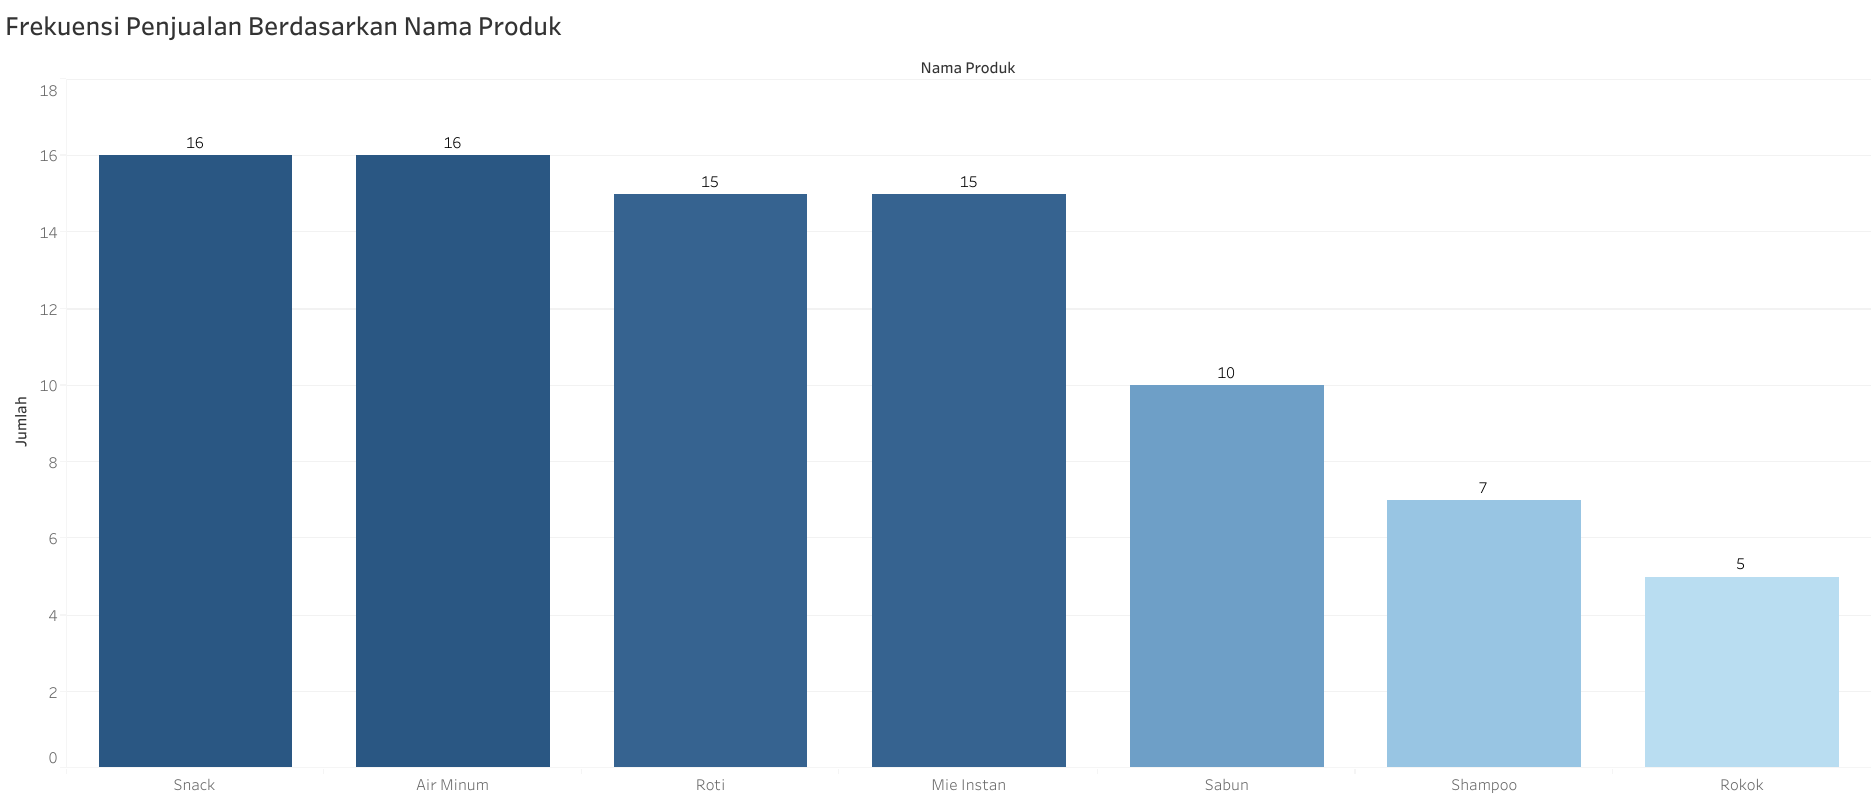

Bahwa, dapat terlihat produk snack dan air minum merupakan produk terbanyak dijual, sementara rokok merupakan produk kurang banyak terjual.

Hal ini dapat dilakukan peningkatan promo untuk shampoo dan rokok (dalam bentuk cross selling dan bundling produk dengan yang lain)

#**Market Basket Analysis Berdasarkan Merk**#

In [ ]:
# Group the transaction
basket = df
basket = basket.groupby(['ID Transaksi', 'Merek'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
12,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
13,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
basket

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
12,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
13,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
10,0,1,0,0,0,0,0,0,0,1,1,0
11,0,0,0,0,0,0,0,1,0,1,0,0
12,0,0,0,1,1,1,0,0,1,0,0,0
13,0,0,1,0,0,0,0,0,0,0,1,1


In [ ]:
basket_sets.columns

Index(['Aquos', 'Chiki', 'Citata', 'Clean', 'Indomi', 'Lifboy', 'Luks',
       'Malioboro', 'Mi Sedap', 'Prambanan', 'Sprit', 'Sri Roti'],
      dtype='object', name='Merek')

In [ ]:
basket_sets.index

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3',
       '4', '5', '6', '7', '8', '9'],
      dtype='object', name='ID Transaksi')

In [ ]:
##item yang sering dibeli
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
1,0.388889,(Chiki)
3,0.333333,(Clean)
10,0.333333,(Sprit)
11,0.333333,(Sri Roti)
0,0.277778,(Aquos)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
7,0.277778,(Malioboro)
16,0.166667,"(Chiki, Clean)"
28,0.166667,"(Indomi, Lifboy)"


**Lift** rule A=>B adalah sebuah ukuran seberapa lebih sering A dan B muncul bersamaan dibandingkan jika mereka saling bebas secara statistika. Jika A dan B saling bebas maka Lift(A=>B)=1 dan jika lift positif maka dikatakan A dan B berkorelasi positif 

**Support** adalah probabilitas A dan B muncul bersamaan.


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
95,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
25,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
24,"(Sprit, Sri Roti)",(Citata),0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
99,"(Aquos, Chiki)","(Lifboy, Sri Roti)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667


In [ ]:
# Filtering
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.000000,0.098765,inf
95,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.000000,0.098765,inf
25,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
96,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
94,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
16,"(Chiki, Sri Roti)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
93,"(Chiki, Aquos, Sri Roti)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
41,"(Indomi, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
53,"(Lifboy, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
47,"(Chiki, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf


In [ ]:
# Filtering
rules[ (rules['lift'] >= 6) & (rules['confidence'] == 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
95,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
25,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
96,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
94,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf


Dapat dilihat bahwa output diatas merupakan Merk yang menghasilkan Large Lift dan Confidence yang tinggi.

In [ ]:
##merek yang paling sering dibeli berbarengan dengan merek lain
rules['consequents'].value_counts()

(Sri Roti)                   12
(Chiki)                      11
(Lifboy)                     11
(Aquos)                       9
(Indomi)                      8
(Clean)                       6
(Aquos, Sri Roti)             4
(Lifboy, Aquos)               3
(Chiki, Sri Roti)             3
(Citata)                      3
(Lifboy, Sri Roti)            3
(Lifboy, Chiki)               3
(Aquos, Chiki)                3
(Luks)                        3
(Sprit)                       3
(Mi Sedap)                    2
(Lifboy, Clean)               1
(Clean, Luks)                 1
(Indomi, Clean)               1
(Indomi, Lifboy)              1
(Prambanan)                   1
(Lifboy, Aquos, Sri Roti)     1
(Indomi, Aquos)               1
(Lifboy, Aquos, Chiki)        1
(Citata, Sri Roti)            1
(Citata, Sprit)               1
(Chiki, Luks)                 1
(Indomi, Sri Roti)            1
(Lifboy, Chiki, Sri Roti)     1
(Chiki, Aquos, Sri Roti)      1
(Chiki, Clean)                1
(Sprit, 

 **Frekuensi Penjualan Berdasarkan Merk**

Di bawah ini terlihat frekuensi penjualan Alfa Indo (Per Merk) berdasarkan database yang diberikan

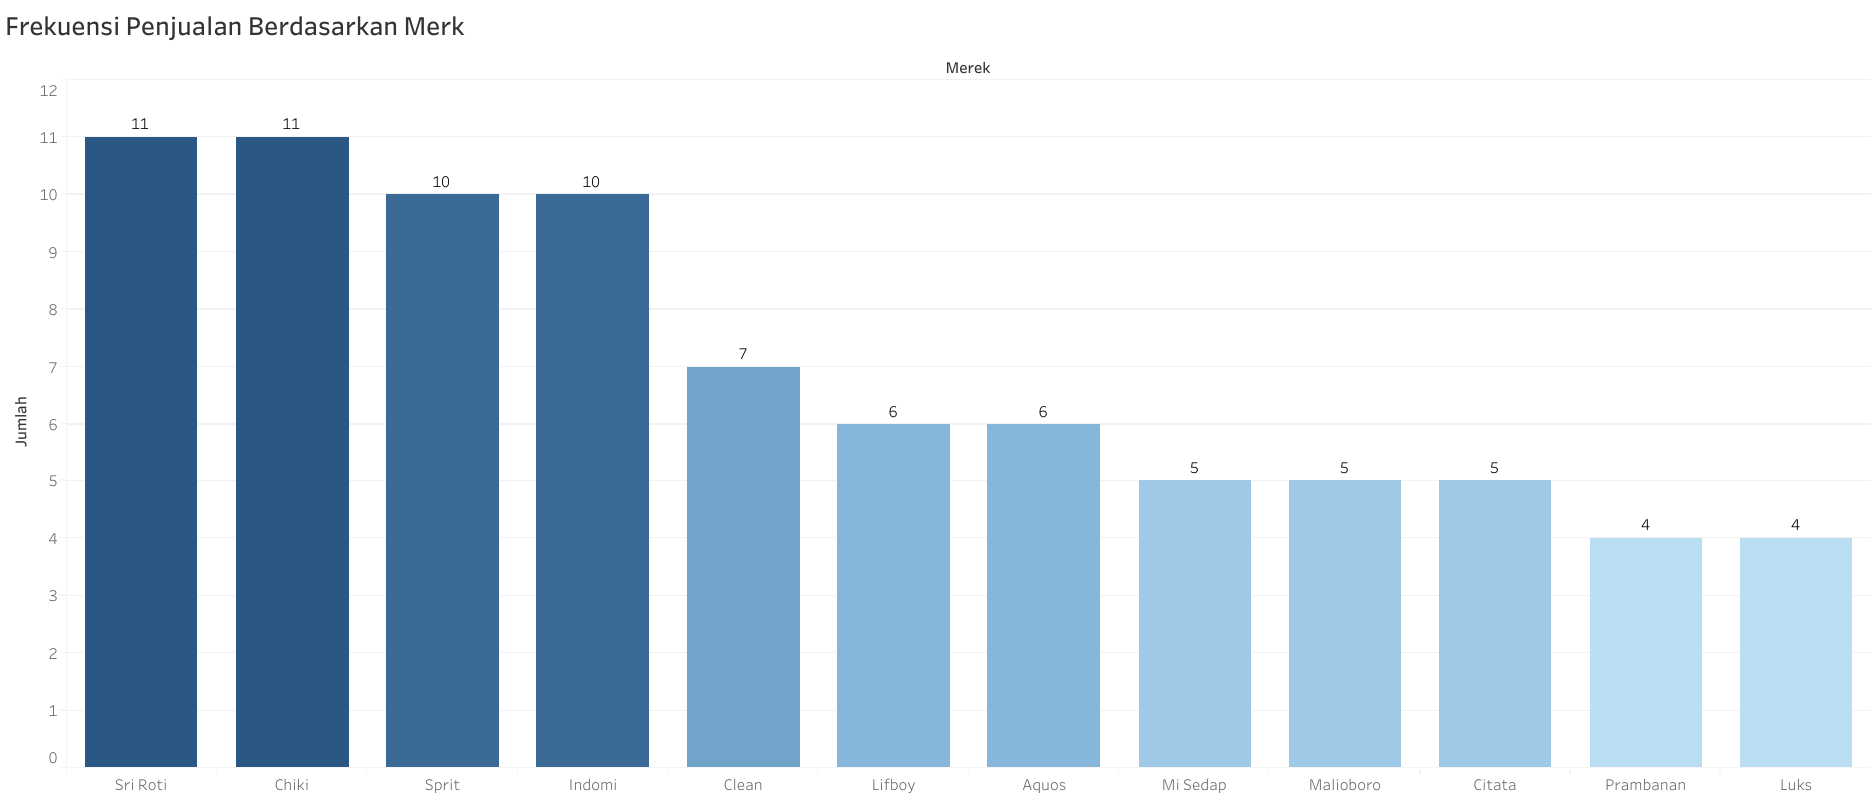

Dapat dilihat bahwa Sriroti dan Chiki adalah merk yang paling banyak terjual

Dan untuk merk Luks dan Prambanan adalah merk yang kurang banyak terjual

Maka, dapat dilakukan promo pada produk tersebut (yang kurang terjual) sehingga pembeli berminat untuk berbelanja produk tersebut pada AlfaIndo (cross selling) atau dapat dilakukan promo Bundling dengan produk terlaku (Contoh Air minum)

#**Executive Summary**#

**Berdasarkan Nama Produk**
1. Barang apa yang sering dibeli dapat dicari melalui nilai support tertinggi yakni diperoleh oleh produk Air minum (0.66) dan barang apa yang jarang dibeli yakni produk Rokok (0.2)
2. Dapat diketahui bahwa large lift 6 yang merepresentasikan barang X (antecedents) bersamaan dibeli dengan barang Y (consequents) dan confidence bernilai 1 (barang X dibeli, maka barang Y dibeli) yakni
      X:  Roti, snack, mie instan
      Y: Sabun, air minum
3. Barang yang belum laku terjual adalah shampoo dan rokok, maka marketing Alfa Indo harus melakukan marketing serta promo dari produk tersebut agar dapat terjadi peningkatan penjualan pada produk.

**Berdasarkan Merek**
1. Merek yang paling sering dibeli melihat dari tingginya nilai support adalah Chiki (Snack), Clean (Shampoo) , dan Sprit (Air Minum).
2. Dapat diketahui bahwa large lift 6 yang merepresentasikan barang X (antecedents) bersamaan dibeli dengan barang Y (consequents) dan confidence bernilai 1 (barang X dibeli, maka barang Y dibeli) yakni
X1 : Chiki, Sri Roti
Y1 : Lifboy, Aquos

X2 : Citata
Y2 : Sprit, Sri Roti

X3 : Lifboy, Chiki
Y3 : Aquos, Sri Roti

X4 : Lifboy, Sri Roti
Y4 : Aquos, Chiki

**Kesimpulan**
Sehingga marketing dari Alfa Indo dapat melakukan bundling promo/promo dari barang tersebut. Penempatan antara makanan ringan (seperti snack dan roti) dapat ditempatkan secara berdekatan agar pembeli dapat memilih produk yang ingin mereka beli (misalkan didalam satu koridor yang sama), dan penempatan antara makanan ringan dengan air minum dan sabun ditempatkan secara berjauhan agar pembeli dapat melihat barang-barang yang lain sehingga menarik perhatian pembeli untuk membeli barang lain.





* Masukan untuk tim AlfaIndo, tim Database dapat membuat dataset dan merekapnya lebih baik dan lengkap lagi (misal: perbulannya) agar dapat dicari insight dalam satuan waktu. sehingga dapat di buat promo berdasarkan hari.

* Rekomendasi Database Alfa Indo dapat ditambahkan kolom baru yakni merupakan  

1.   variabel Membership : sehingga dapat melihat kategori serta pattern pembeli di Alfa Indo dan dapat melakukan promo marketing berdasarkan membership tersebut
2.   variabel Payment (pembayaran dengan cash/kartu/atau lainnya) : agar dapat memplot skema pembayaran dan melakukan peningkatan kapasitas berdasarkan skema pembayaran Alfa Indo

* Selain itu, untuk mempermudah kategorisasi, penempatan jenis produk dilakukan  berdekatan berdasarkan ID produknya. Dapat terlihat melalui gambar di bawah ini



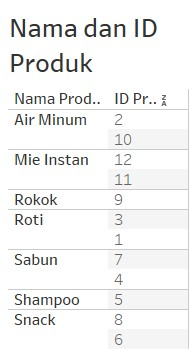

Contoh untuk jenis produk Air minum, maka ID Produk 2 dan 10 ditaruh secara berdekatan, dan Mie instan (ID produk 12 dan 11) dilakukan berdekatan